# CoDel Test
This test compares the CoDel(and blocking) enabled model vs original model

## test 1: rule 1 is applied 

In [ ]:
if self.minLat <= self.minLatTarget:
    self.curBlockingDur = self.preBlockingDur / 2
else:
    self.curBlockingDur = self.preBlockingDur + self.constLat

latency model:
reqSize, lgMult=820.28, lgAdd=-1114.3, smMult=62.36, smAdd=5905.97, mu=5.1 

In order to see the effect of CoDel and Blocking, we need to compare the two runs:
First run, we **Enable** Blocking mechanism:

In [ ]:
# codel variables
codel_const_lat = 300
codel_target_lat = 1700

In [ ]:
run -i ../../scripts/radossim_blocking.py

enableBlocking = True


blocing is Enabled
number of priority inversion = 143302 number of txcs = 299994
average bluestore latency(s) = 0.0015429911181574667
average total latency(s) = 0.001622049069756323
average osd queue size = 0.8079287195247968
average kv queue size = 3.618195812807882


[Text(0, 0.5, 'kv_queue size'),
 Text(0.5, 0, 'time'),
 Text(0.5, 1.0, 'bluestore kv queue size')]

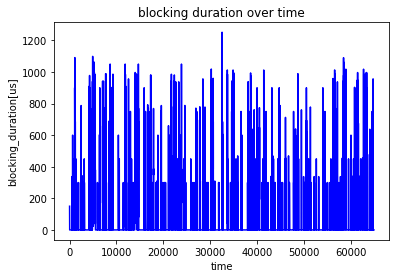

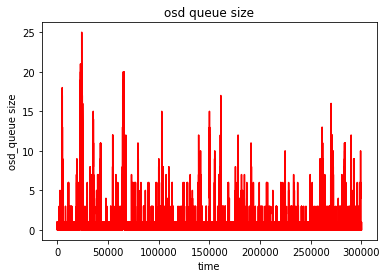

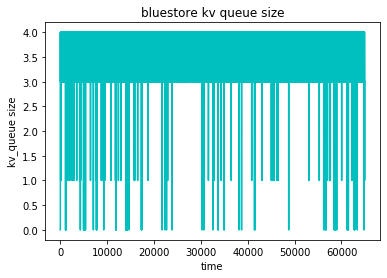

In [203]:
import matplotlib.pyplot as plt
from statistics import mean

# get average bs_lat(bs_lat is the latency in bluestore)
bs_lat_list = [x[1] for x in bs_lat_vec]
total_lat_list = [x[1] for x in total_lat_vec]
print("blocing is Enabled")

'''priInv = 0 # number of priority inversion
for i in list(zip(*[iter(bs_lat_vec)]*3)):
    if i[0][0] > i[1][0] or i[1][0] > i[2][0]:
        priInv = priInv + 1
print("number of priority inversion =",priInv)'''
priInv = 0 # number of priority inversion
txn_numbers = len(bs_lat_vec)
for i in range(txn_numbers - 1):
    if bs_lat_vec[i][0] < bs_lat_vec[i+1][0]:
        priInv = priInv + 1
print("number of priority inversion =",priInv, "number of txcs =", txn_numbers)

fig, ax = plt.subplots()
#ax.set_yscale('log')
ax.plot(blocking_dur_vec, 'b-')
ax.set(xlabel='time', ylabel='blocking_duration[us]', title='blocking duration over time')

print("average bluestore latency(s) =",mean(bs_lat_list)/1000000)
print("average total latency(s) =",mean(total_lat_list)/1000000)

print("average osd queue size =",mean(osd_queue_size_vec))
fig, ax = plt.subplots()
ax.plot(osd_queue_size_vec, 'r-')
ax.set(xlabel='time', ylabel='osd_queue size', title='osd queue size')

print("average kv queue size =",mean(kv_queue_size_vec))
fig, ax = plt.subplots()
ax.plot(kv_queue_size_vec, 'c-')
ax.set(xlabel='time', ylabel='kv_queue size', title='bluestore kv queue size')

In second run, we **disable** the Blocking mechanism: make sure enableBlocking is **False**

In [1]:
run -i ../../scripts/radossim_blocking.py

enableBlocking = False
-------- CoDel Parameters --------
target lat = 1700
const lat = 300
----------------------------------
total bytes = 1228767232
total time(s) = 60.0
average throughput(MB/s) = 19.530729166666667


blocing is DISABLED
number of priority inversion = 148427 number of txcs = 299992
average bluestore latency(s) = 0.0015440198156079356
average total latency(s) = 0.0015545361461779719
average osd queue size = 0.5155601037340249
average kv queue size = 3.611720035049423


[Text(0, 0.5, 'kv_queue size'),
 Text(0.5, 0, 'time'),
 Text(0.5, 1.0, 'bluestore kv queue size')]

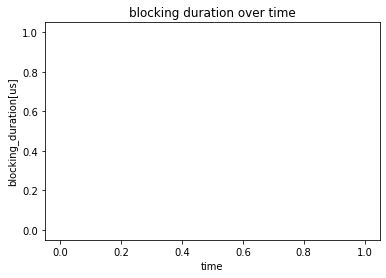

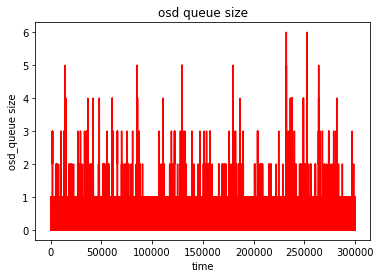

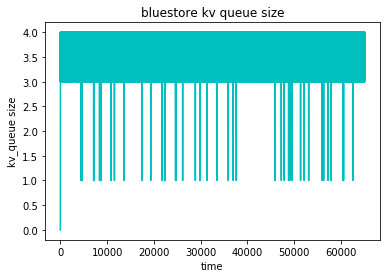

In [2]:
import matplotlib.pyplot as plt
from statistics import mean

# get average bs_lat(bs_lat is the latency in bluestore)
bs_lat_list = [x[1] for x in bs_lat_vec]
total_lat_list = [x[1] for x in total_lat_vec]
print("blocing is DISABLED")

priInv = 0 # number of priority inversion
txn_numbers = len(bs_lat_vec)
for i in range(txn_numbers - 1):
    if bs_lat_vec[i][0] < bs_lat_vec[i+1][0]:
        priInv = priInv + 1
print("number of priority inversion =",priInv, "number of txcs =", txn_numbers)

fig, ax = plt.subplots()
#ax.set_yscale('log')
ax.plot(blocking_dur_vec, 'b-')
ax.set(xlabel='time', ylabel='blocking_duration[us]', title='blocking duration over time')

print("average bluestore latency(s) =",mean(bs_lat_list)/1000000)
print("average total latency(s) =",mean(total_lat_list)/1000000)

print("average osd queue size =",mean(osd_queue_size_vec))
fig, ax = plt.subplots()
ax.plot(osd_queue_size_vec, 'r-')
ax.set(xlabel='time', ylabel='osd_queue size', title='osd queue size')

print("average kv queue size =",mean(kv_queue_size_vec))
fig, ax = plt.subplots()
ax.plot(kv_queue_size_vec, 'c-')
ax.set(xlabel='time', ylabel='kv_queue size', title='bluestore kv queue size')